In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_parquet('Temps.parquet')
#thousands ve decimal değerleri veri giriş şekillerine göre veri okunmasını sağlar.

In [3]:
data

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
1,1743-12-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
2,1744-01-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
3,1744-02-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
4,1744-03-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
...,...,...,...,...,...,...,...
8599207,2013-05-01,11.464,0.236,Zwolle,Netherlands,52.24N,5.26E
8599208,2013-06-01,15.043,0.261,Zwolle,Netherlands,52.24N,5.26E
8599209,2013-07-01,18.775,0.193,Zwolle,Netherlands,52.24N,5.26E
8599210,2013-08-01,18.025,0.298,Zwolle,Netherlands,52.24N,5.26E


In [4]:
data.dtypes

dt                               datetime64[ns]
AverageTemperature                      float64
AverageTemperatureUncertainty           float64
City                                     object
Country                                  object
Latitude                                 object
Longitude                                object
dtype: object

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8599212 entries, 0 to 8599211
Data columns (total 7 columns):
 #   Column                         Dtype         
---  ------                         -----         
 0   dt                             datetime64[ns]
 1   AverageTemperature             float64       
 2   AverageTemperatureUncertainty  float64       
 3   City                           object        
 4   Country                        object        
 5   Latitude                       object        
 6   Longitude                      object        
dtypes: datetime64[ns](1), float64(2), object(4)
memory usage: 459.2+ MB


In [6]:
data.describe()

,AverageTemperature,AverageTemperatureUncertainty
count,8.235082e+06,8.235082e+06
mean,1.672743e+01,1.028575e+00
std,1.035344e+01,1.129733e+00
min,-4.270400e+01,3.400000e-02
25%,1.029900e+01,3.370000e-01
50%,1.883100e+01,5.910000e-01
75%,2.521000e+01,1.349000e+00
max,3.965100e+01,1.539600e+01


In [7]:
data.to_pickle("Temps.pickle")

In [8]:
data.to_parquet("Temps.parquet")

In [9]:
data.shape

(8599212, 7)

In [10]:
data.isna().sum()

dt                                    0
AverageTemperature               364130
AverageTemperatureUncertainty    364130
City                                  0
Country                               0
Latitude                              0
Longitude                             0
dtype: int64

In [11]:
data.isna().sum() / data.shape[0] * 100

dt                               0.000000
AverageTemperature               4.234458
AverageTemperatureUncertainty    4.234458
City                             0.000000
Country                          0.000000
Latitude                         0.000000
Longitude                        0.000000
dtype: float64

In [12]:
data_prepared = data.dropna()
# dropna(inplace = True) der isek na'ları düşürülmüş df'i kendine eşitler.
# satırdan değil de sütundan temizleme yapmak ister isek axis = 1 deriz
# thresh ile eşik değeri belirtip o eşik değeri aşanı drop edebiliyoruz

In [13]:
data.shape

(8599212, 7)

In [14]:
data_prepared.shape

(8235082, 7)

In [15]:
data_prepared.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
5,1744-04-01,5.788,3.624,Århus,Denmark,57.05N,10.33E
6,1744-05-01,10.644,1.283,Århus,Denmark,57.05N,10.33E
7,1744-06-01,14.051,1.347,Århus,Denmark,57.05N,10.33E
8,1744-07-01,16.082,1.396,Århus,Denmark,57.05N,10.33E


In [16]:
type(data['dt'])

pandas.core.series.Series

In [17]:
type(data[['dt']])

pandas.core.frame.DataFrame

In [18]:
pd.set_option("display.max_rows", 200) 

In [19]:
data_prepared["Country"].value_counts()

India                                 960548
China                                 819132
United States                         661524
Brazil                                451645
Russia                                448663
Japan                                 356467
Indonesia                             273295
Germany                               256446
United Kingdom                        215288
Mexico                                208020
Nigeria                               157012
Spain                                 156528
Turkey                                147086
Iran                                  146168
Italy                                 132972
Philippines                           124865
Pakistan                              123265
Poland                                120308
France                                113976
South Africa                           93653
Venezuela                              83378
Colombia                               79246
Romania   

In [20]:
data_prepared["Country"].value_counts().count()

159

In [21]:
data_prepared["Country"].value_counts().shape

(159,)

In [22]:
mask_tr = data_prepared['Country'] == "Turkey"
mask_br = data_prepared['Country'] == "Brazil"

In [23]:
mask_tr

0          False
5          False
6          False
7          False
8          False
           ...  
8599206    False
8599207    False
8599208    False
8599209    False
8599210    False
Name: Country, Length: 8235082, dtype: bool

In [24]:
mask_br

0          False
5          False
6          False
7          False
8          False
           ...  
8599206    False
8599207    False
8599208    False
8599209    False
8599210    False
Name: Country, Length: 8235082, dtype: bool

In [25]:
data_prepared[mask_tr]

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
3239,1743-11-01,10.013,2.291,Çorlu,Turkey,40.99N,27.69E
3244,1744-04-01,13.685,2.162,Çorlu,Turkey,40.99N,27.69E
3245,1744-05-01,15.021,1.824,Çorlu,Turkey,40.99N,27.69E
3246,1744-06-01,19.663,1.701,Çorlu,Turkey,40.99N,27.69E
3247,1744-07-01,22.314,1.648,Çorlu,Turkey,40.99N,27.69E
...,...,...,...,...,...,...,...
8585429,2013-04-01,11.876,0.293,Zonguldak,Turkey,40.99N,31.95E
8585430,2013-05-01,17.662,0.196,Zonguldak,Turkey,40.99N,31.95E
8585431,2013-06-01,19.818,0.344,Zonguldak,Turkey,40.99N,31.95E
8585432,2013-07-01,21.343,0.288,Zonguldak,Turkey,40.99N,31.95E


In [26]:
data_prepared[mask_br]

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
152741,1832-01-01,25.953,1.570,Alagoinhas,Brazil,12.05S,37.81W
152742,1832-02-01,25.933,2.372,Alagoinhas,Brazil,12.05S,37.81W
152743,1832-03-01,25.968,1.585,Alagoinhas,Brazil,12.05S,37.81W
152744,1832-04-01,25.100,2.175,Alagoinhas,Brazil,12.05S,37.81W
152745,1832-05-01,24.213,1.809,Alagoinhas,Brazil,12.05S,37.81W
...,...,...,...,...,...,...,...
8109067,2013-04-01,20.240,0.483,Volta Redonda,Brazil,21.70S,44.13W
8109068,2013-05-01,18.377,0.527,Volta Redonda,Brazil,21.70S,44.13W
8109069,2013-06-01,18.072,0.398,Volta Redonda,Brazil,21.70S,44.13W
8109070,2013-07-01,17.539,0.646,Volta Redonda,Brazil,21.70S,44.13W


In [27]:
# pd.concat([data_prepared[mask_tr], data_prepared[mask_br]],axis = 0)

In [28]:
data_prepared[mask_tr | mask_br]

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
3239,1743-11-01,10.013,2.291,Çorlu,Turkey,40.99N,27.69E
3244,1744-04-01,13.685,2.162,Çorlu,Turkey,40.99N,27.69E
3245,1744-05-01,15.021,1.824,Çorlu,Turkey,40.99N,27.69E
3246,1744-06-01,19.663,1.701,Çorlu,Turkey,40.99N,27.69E
3247,1744-07-01,22.314,1.648,Çorlu,Turkey,40.99N,27.69E
...,...,...,...,...,...,...,...
8585429,2013-04-01,11.876,0.293,Zonguldak,Turkey,40.99N,31.95E
8585430,2013-05-01,17.662,0.196,Zonguldak,Turkey,40.99N,31.95E
8585431,2013-06-01,19.818,0.344,Zonguldak,Turkey,40.99N,31.95E
8585432,2013-07-01,21.343,0.288,Zonguldak,Turkey,40.99N,31.95E


In [29]:
mask_temperature = data_prepared['AverageTemperature'] > 20

In [30]:
mask_temperature

0          False
5          False
6          False
7          False
8          False
           ...  
8599206    False
8599207    False
8599208    False
8599209    False
8599210    False
Name: AverageTemperature, Length: 8235082, dtype: bool

In [31]:
data_prepared[mask_tr & mask_temperature]

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
3247,1744-07-01,22.314,1.648,Çorlu,Turkey,40.99N,27.69E
3318,1750-06-01,20.183,1.685,Çorlu,Turkey,40.99N,27.69E
3319,1750-07-01,24.420,1.603,Çorlu,Turkey,40.99N,27.69E
3320,1750-08-01,23.217,1.692,Çorlu,Turkey,40.99N,27.69E
3330,1751-06-01,21.248,1.740,Çorlu,Turkey,40.99N,27.69E
...,...,...,...,...,...,...,...
8585419,2012-06-01,20.797,0.353,Zonguldak,Turkey,40.99N,31.95E
8585420,2012-07-01,23.516,0.298,Zonguldak,Turkey,40.99N,31.95E
8585421,2012-08-01,21.869,0.767,Zonguldak,Turkey,40.99N,31.95E
8585432,2013-07-01,21.343,0.288,Zonguldak,Turkey,40.99N,31.95E


In [32]:
mask = data_prepared['Country'].isin(['Turkey', 'Brazil', 'United States'])

In [33]:
mask

0          False
5          False
6          False
7          False
8          False
           ...  
8599206    False
8599207    False
8599208    False
8599209    False
8599210    False
Name: Country, Length: 8235082, dtype: bool

In [34]:
pd.set_option("display.max_rows", 200) 
data_selected = data_prepared[mask]

In [35]:
data_selected.groupby(by = "Country").mean()

,AverageTemperature,AverageTemperatureUncertainty
Country,,
Brazil,21.902763,0.869764
Turkey,12.951888,1.275864
United States,13.949335,1.089550


In [36]:
data_selected.groupby(by = "Country").max()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Latitude,Longitude
Country,,,,,,
Brazil,2013-08-01,30.495,5.277,Várzea Paulista,8.84S,67.91W
Turkey,2013-08-01,32.885,9.237,Çorum,42.59N,42.71E
United States,2013-09-01,34.379,10.519,Yonkers,61.88N,99.24W


In [37]:
data_selected.groupby(by = "Country").agg(["min","max","mean"])

AverageTemperature                     \
                             min     max       mean   
Country                                               
Brazil                     9.591  30.495  21.902763   
Turkey                   -15.353  32.885  12.951888   
United States            -25.163  34.379  13.949335   

              AverageTemperatureUncertainty                    
                                        min     max      mean  
Country                                                        
Brazil                                0.040   5.277  0.869764  
Turkey                                0.056   9.237  1.275864  
United States                         0.040  10.519  1.089550

In [38]:
data_selected.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
3239,1743-11-01,10.013,2.291,Çorlu,Turkey,40.99N,27.69E
3244,1744-04-01,13.685,2.162,Çorlu,Turkey,40.99N,27.69E
3245,1744-05-01,15.021,1.824,Çorlu,Turkey,40.99N,27.69E
3246,1744-06-01,19.663,1.701,Çorlu,Turkey,40.99N,27.69E
3247,1744-07-01,22.314,1.648,Çorlu,Turkey,40.99N,27.69E


In [39]:
mask_tr = data_selected['Country'] == "Turkey"
mask_br = data_selected['Country'] == "Brazil"

In [40]:
AvgTmpTR = data_selected[mask_tr]["AverageTemperature"]
AvgTmpBR = data_selected[mask_br]["AverageTemperature"]

In [41]:
AvgTmpTR

3239       10.013
3244       13.685
3245       15.021
3246       19.663
3247       22.314
            ...  
8585429    11.876
8585430    17.662
8585431    19.818
8585432    21.343
8585433    22.225
Name: AverageTemperature, Length: 147086, dtype: float64

C:\Users\ABRA\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ABRA\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


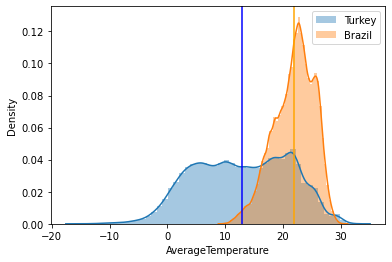

In [42]:
sns.distplot(AvgTmpTR,label = "Turkey")
sns.distplot(AvgTmpBR,label = "Brazil")
plt.axvline(AvgTmpTR.mean(),0,1,color = "blue")
plt.axvline(AvgTmpBR.mean(),0,1,color = "orange")
plt.legend()
plt.show()

In [43]:
data_selected["Country"].value_counts().index

Index(['United States', 'Brazil', 'Turkey'], dtype='object')

In [44]:
ulkeler = data_selected["Country"].unique()

C:\Users\ABRA\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ABRA\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ABRA\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

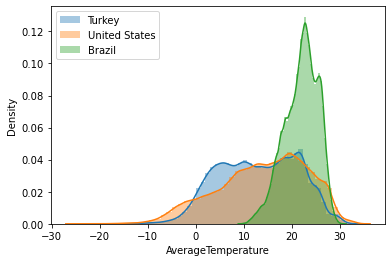

In [45]:
for i in ulkeler:
    mask = data_selected['Country'] == i
    sns.distplot(data_selected[mask]["AverageTemperature"],label = i)
    plt.legend()
plt.show()

C:\Users\ABRA\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ABRA\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ABRA\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

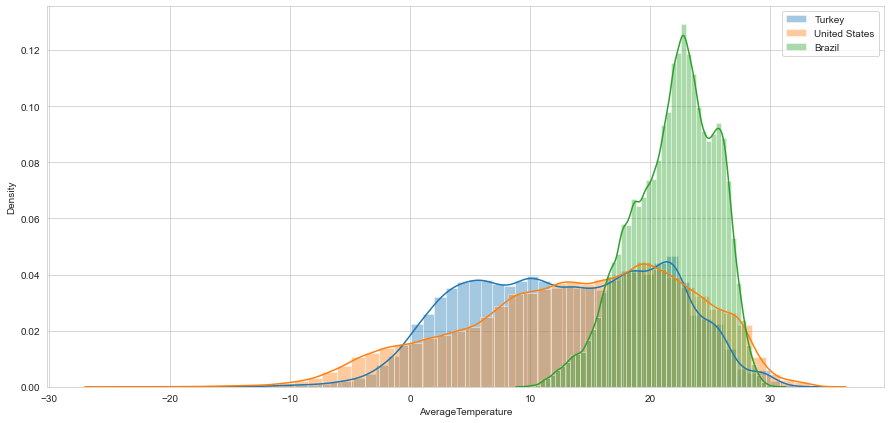

In [46]:
sns.set_style("whitegrid")
plt.figure(figsize = (15,7))
for i in ulkeler:
    mask = data_selected['Country'] == i
    sns.distplot(data_selected[mask]["AverageTemperature"],label = i)
    plt.legend()
plt.show()

C:\Users\ABRA\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ABRA\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ABRA\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

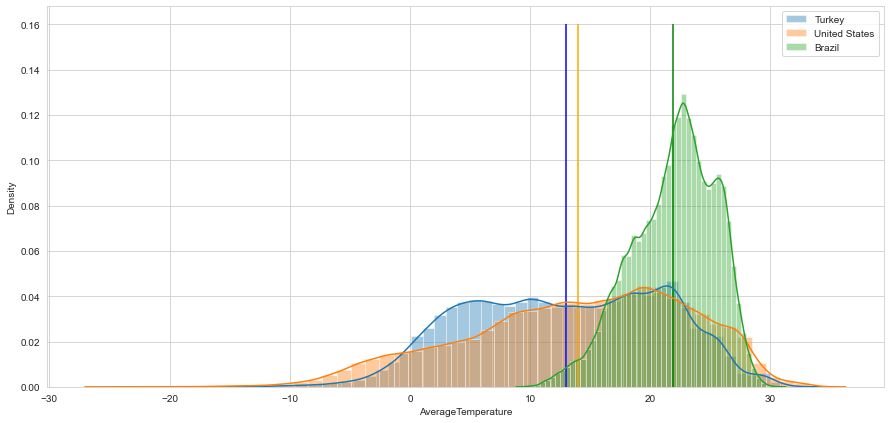

In [47]:
sns.set_style("whitegrid")
plt.figure(figsize = (15,7))
colors = ["blue","orange","green"]
for color, i in zip(colors,ulkeler):
    mask = data_selected['Country'] == i
    sns.distplot(data_selected[mask]["AverageTemperature"],label = i)
    ulke_mean = data_selected[mask]["AverageTemperature"].mean()
    plt.vlines(ulke_mean,ymin = 0,ymax = 0.16,colors = color)
    plt.legend()
plt.show()

# Tam otomatikleştirme

In [48]:
data_selected.columns

Index(['dt', 'AverageTemperature', 'AverageTemperatureUncertainty', 'City',
       'Country', 'Latitude', 'Longitude'],
      dtype='object')

In [49]:
data_selected.columns[1:3]

Index(['AverageTemperature', 'AverageTemperatureUncertainty'], dtype='object')

C:\Users\ABRA\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


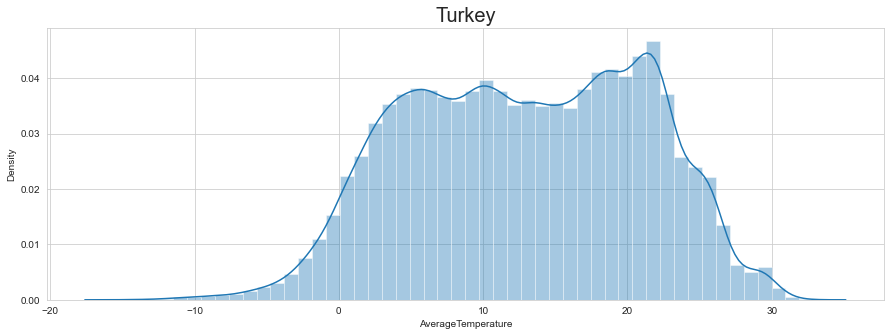

C:\Users\ABRA\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


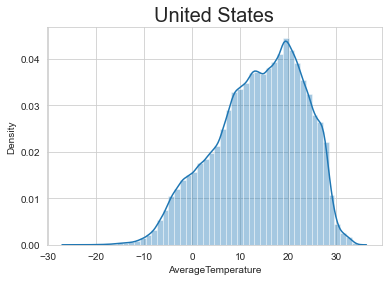

C:\Users\ABRA\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


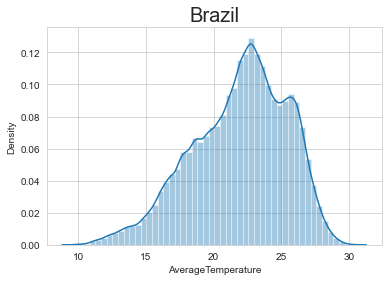

C:\Users\ABRA\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


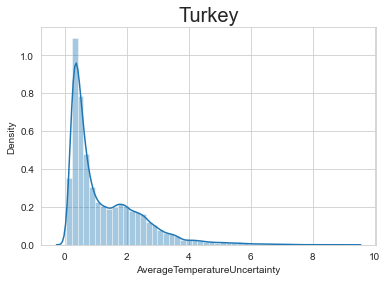

C:\Users\ABRA\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


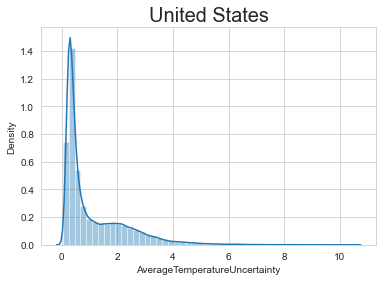

C:\Users\ABRA\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


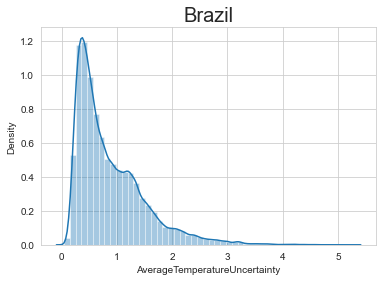

In [50]:
kolonlar = data_selected.columns[1:3]
ulkeler = data_selected['Country'].unique()
plt.figure(figsize = (15,5))
for kolon in kolonlar:
    for ulke in ulkeler:
        sns.distplot(data_selected[data_selected['Country'] == ulke][kolon])
        plt.title(ulke,fontsize = 20)
        plt.show()

C:\Users\ABRA\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ABRA\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ABRA\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

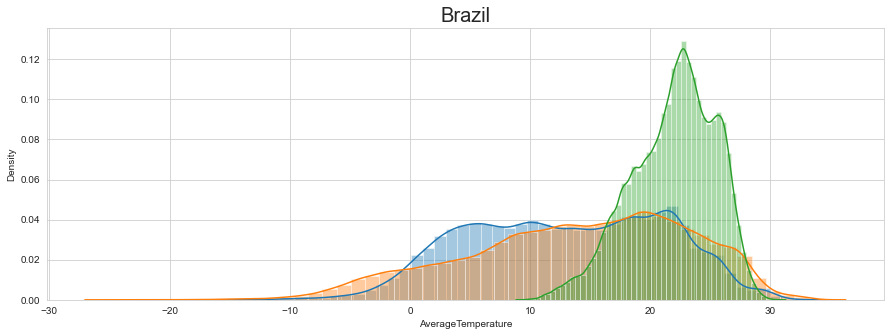

C:\Users\ABRA\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ABRA\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ABRA\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

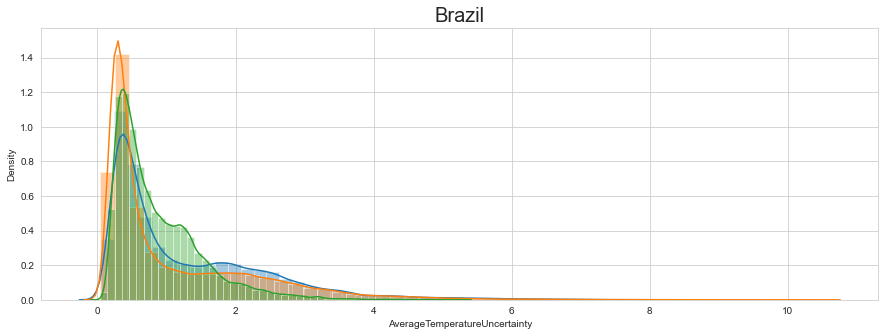

In [51]:
kolonlar = data_selected.columns[1:3]
ulkeler = data_selected['Country'].unique()
for kolon in kolonlar:
    plt.figure(figsize = (15,5))
    for ulke in ulkeler:
        sns.distplot(data_selected[data_selected['Country'] == ulke][kolon])
        plt.title(ulke,fontsize = 20)
    plt.show()

# Scatter Plot

In [52]:
data_selected.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
3239,1743-11-01,10.013,2.291,Çorlu,Turkey,40.99N,27.69E
3244,1744-04-01,13.685,2.162,Çorlu,Turkey,40.99N,27.69E
3245,1744-05-01,15.021,1.824,Çorlu,Turkey,40.99N,27.69E
3246,1744-06-01,19.663,1.701,Çorlu,Turkey,40.99N,27.69E
3247,1744-07-01,22.314,1.648,Çorlu,Turkey,40.99N,27.69E


In [53]:
tr_data = data_selected[(data_selected['Country'] == 'Turkey') & ( data_selected['dt'] > "01.01.1990")]

<AxesSubplot:xlabel='dt', ylabel='AverageTemperature'>

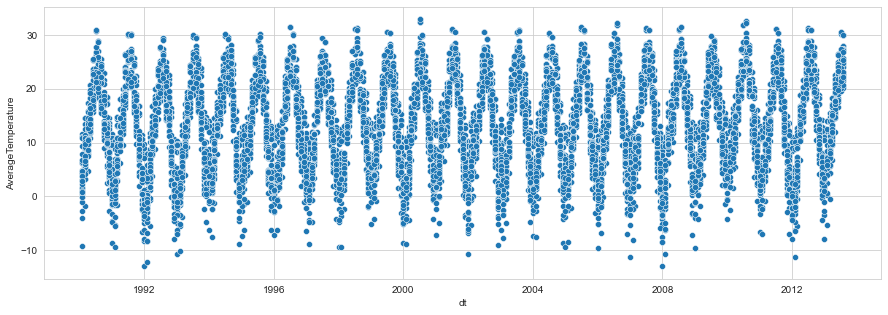

In [54]:
plt.figure(figsize = (15,5))
sns.scatterplot(x = 'dt',y = 'AverageTemperature',data = tr_data)

<AxesSubplot:xlabel='dt', ylabel='AverageTemperature'>

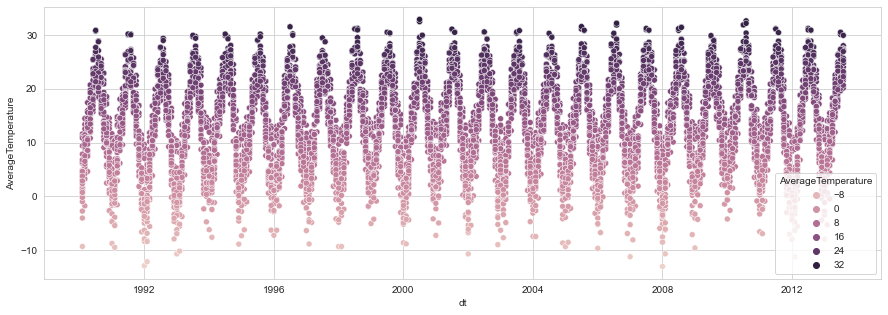

In [55]:
plt.figure(figsize = (15,5))
sns.scatterplot(x = 'dt',y = 'AverageTemperature',data = tr_data, hue = 'AverageTemperature')

In [56]:
tr_data['City'].value_counts()

Eskisehir         283
Gebze             283
Isparta           283
Mersin            283
Izmit             283
Siirt             283
Ordu              283
Çorum             283
Edirne            283
Erzurum           283
Esenyurt          283
Izmir             283
Usak              283
Afyonkarahisar    283
Alanya            283
Konya             283
Denizli           283
Turhal            283
Tarsus            283
Zonguldak         283
Aksaray           283
Tokat             283
Sivas             283
Çorlu             283
Turgutlu          283
Karaman           283
Ankara            283
Gaziantep         283
Nazilli           283
Urfa              283
Iskenderun        283
Viransehir        283
Tekirdag          283
Trabzon           283
Manisa            283
Kahramanmaras     283
Antalya           283
Van               283
Bursa             283
Osmaniye          283
Erzincan          283
Adana             283
Siverek           283
Malatya           283
Samsun            283
Batman    

<AxesSubplot:xlabel='dt', ylabel='AverageTemperature'>

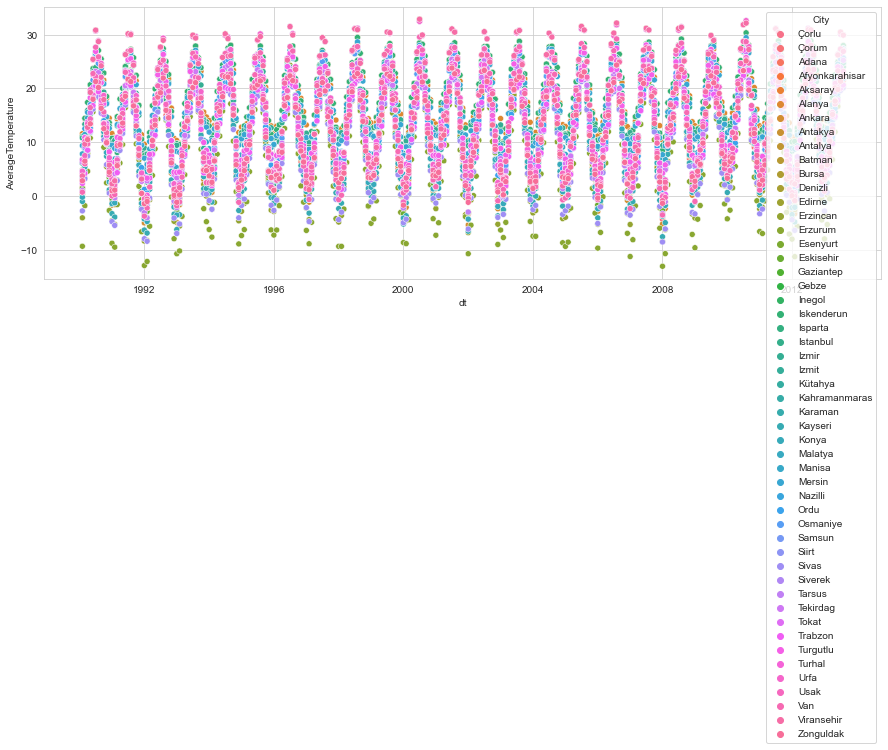

In [57]:
plt.figure(figsize = (15,5))
sns.scatterplot(x = 'dt',y = 'AverageTemperature',data = tr_data, hue = 'City')

<AxesSubplot:xlabel='dt', ylabel='AverageTemperature'>

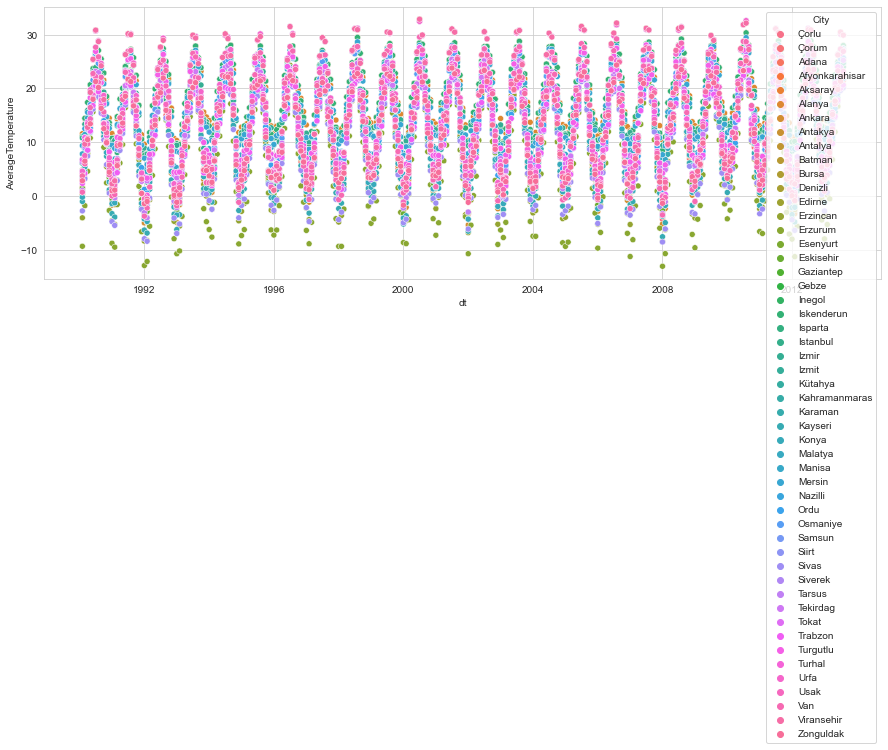

In [58]:
plt.figure(figsize = (15,5))
sns.scatterplot(x = 'dt',y = 'AverageTemperature',data = tr_data, hue = 'City')

In [59]:
tr_data_means = tr_data.groupby(by = tr_data['dt'].dt.to_period("Y")).mean()
tr_data_means = tr_data_means.reset_index()
tr_data_means.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 3 columns):
 #   Column                         Non-Null Count  Dtype        
---  ------                         --------------  -----        
 0   dt                             24 non-null     period[A-DEC]
 1   AverageTemperature             24 non-null     float64      
 2   AverageTemperatureUncertainty  24 non-null     float64      
dtypes: float64(2), period[A-DEC](1)
memory usage: 704.0 bytes


In [60]:
tr_data_means['dt'].astype('datetime64')

TypeError: Cannot cast PeriodArray to dtype datetime64

In [61]:
tr_data_means['dt'].astype('string')

0     1990
1     1991
2     1992
3     1993
4     1994
5     1995
6     1996
7     1997
8     1998
9     1999
10    2000
11    2001
12    2002
13    2003
14    2004
15    2005
16    2006
17    2007
18    2008
19    2009
20    2010
21    2011
22    2012
23    2013
Name: dt, dtype: string

In [62]:
tr_data_means['dt'] = tr_data_means['dt'].astype('string').astype('datetime64')

In [63]:
tr_data_means['dt']

0    1990-01-01
1    1991-01-01
2    1992-01-01
3    1993-01-01
4    1994-01-01
5    1995-01-01
6    1996-01-01
7    1997-01-01
8    1998-01-01
9    1999-01-01
10   2000-01-01
11   2001-01-01
12   2002-01-01
13   2003-01-01
14   2004-01-01
15   2005-01-01
16   2006-01-01
17   2007-01-01
18   2008-01-01
19   2009-01-01
20   2010-01-01
21   2011-01-01
22   2012-01-01
23   2013-01-01
Name: dt, dtype: datetime64[ns]

<AxesSubplot:xlabel='dt', ylabel='AverageTemperature'>

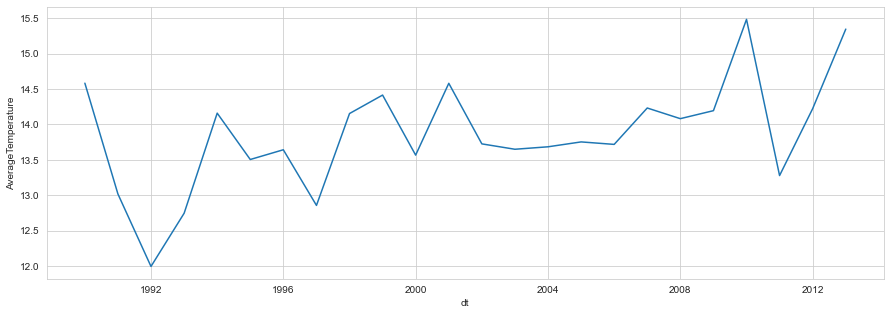

In [66]:
plt.figure(figsize = (15,5))
sns.lineplot(x = 'dt',y = 'AverageTemperature',data = tr_data_means)